In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import statsmodels.api as sm
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from bokeh.io import output_notebook
output_notebook()

from bokeh.plotting import figure
from bokeh.io import show

Loading BokehJS ...

In [3]:
datadir = r"C:\Users\My Computer\Documents\MSc Business Analytics\Dissertation"

# Dataset 1 

### Load the data 

In [4]:
df1 = pd.read_excel(datadir + "/Dataset_1.xlsx",
                 dtype={"Year": np.unicode_})

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
Partner_Country    1338 non-null object
Year               1338 non-null object
FDI                1338 non-null float64
Brexit             1338 non-null object
dtypes: float64(1), object(3)
memory usage: 41.9+ KB


In [6]:
df1.head()

,Partner_Country,Year,FDI,Brexit
0,Afghanistan,2013,0.0,No
1,Afghanistan,2014,0.0,No
2,Afghanistan,2015,0.0,No
3,Afghanistan,2016,0.0,Yes
4,Afghanistan,2017,0.0,Yes


### Delete rows from Partner_Country column

In [7]:
df1["Partner_Country"].value_counts()

Bulgaria                                  6
Ethiopia                                  6
American Samoa                            6
Indonesia                                 6
Saint Helena                              6
Brazil                                    6
Japan                                     6
Guinea                                    6
Nigeria                                   6
Cabo Verde                                6
Tajikistan                                6
Guam                                      6
Norfolk Island                            6
Seychelles                                6
Curacao                                   6
Bahamas                                   6
Korea, Democratic People's Republic of    6
Solomon Islands                           6
Bangladesh                                6
Morocco                                   6
Taipei, Chinese                           6
Lao People's Democratic Republic          6
Cameroon                        

In [8]:
df1 = df1.drop(df1[df1.Partner_Country == "World"].index)
df1 = df1.drop(df1[df1.Partner_Country == "United_Kingdom"].index)
df1 = df1.drop(df1[df1.Partner_Country == "Africa_not_elsewhere_specified"].index)
df1 = df1.drop(df1[df1.Partner_Country == "America_not_elsewhere_specified"].index)
df1 = df1.drop(df1[df1.Partner_Country == "Area_not_elsewhere_specified"].index)
df1 = df1.drop(df1[df1.Partner_Country == "Asia_not_elsewhere_specified"].index)
df1 = df1.drop(df1[df1.Partner_Country == "Europe_not_elsewhere_specified"].index)
df1 = df1.drop(df1[df1.Partner_Country == "Oceania_not_elsewhere_specified"].index)

In [9]:
df1["Partner_Country"].value_counts()

Bulgaria                                  6
Curacao                                   6
American Samoa                            6
Indonesia                                 6
Saint Helena                              6
Brazil                                    6
Japan                                     6
Guinea                                    6
Nigeria                                   6
Thailand                                  6
Tajikistan                                6
Guam                                      6
Norfolk Island                            6
Ethiopia                                  6
Seychelles                                6
Bahamas                                   6
Korea, Democratic People's Republic of    6
Solomon Islands                           6
Bangladesh                                6
Morocco                                   6
Taipei, Chinese                           6
Lao People's Democratic Republic          6
Cameroon                        

### Replace "Unknown" and "Data missing or out of range" with NaN, so later on we can deal with missing values

In [10]:
# Replace all "Unknown" values with Nan
df1 = df1.replace("Unknown",np.NaN)
# do the same with "Data missing or out of range" values
df1 = df1.replace("Data missing or out of range",np.NaN)

In [11]:
df1.head()

,Partner_Country,Year,FDI,Brexit
0,Afghanistan,2013,0.0,No
1,Afghanistan,2014,0.0,No
2,Afghanistan,2015,0.0,No
3,Afghanistan,2016,0.0,Yes
4,Afghanistan,2017,0.0,Yes


# Macroeconomic indicators dataset 

### Load the data 

In [12]:
df2 = pd.read_excel(datadir + "/Macroeconomic_indicators.xlsx",
            
                        dtype={"Year": np.unicode_})


In [13]:
df2.head()

,Year,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
0,2013,0.021395,0.639661,0.023898,-132605.80,0.075500,0.023,64106000,0.23,0.61182
1,2014,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398
2,2015,0.023553,0.654545,0.019010,-143676.90,0.053250,0.004,65110000,0.20,0.56683
3,2016,0.019183,0.740634,0.013052,-140349.00,0.048250,0.010,65648000,0.20,0.58498
4,2017,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
Year                        6 non-null object
Real_GDP                    6 non-null float64
Exchange_Rate               6 non-null float64
Long_Term_Interest_Rates    6 non-null float64
Current_Account_Balance     6 non-null float64
Unemployment_Rate           6 non-null float64
Inflation                   6 non-null float64
Population                  6 non-null int64
Corporate_Tax_Rate          6 non-null float64
Trade_Openess               6 non-null float64
dtypes: float64(8), int64(1), object(1)
memory usage: 560.0+ bytes


### Replace "Not Known", "Data missing" and "-1" with Nan

In [15]:
df2 = df2.replace("Not known", np.NaN)
df2 = df2.replace("Data missing or out of range", np.NaN)

# Join the two dataframes 

In [16]:
df1.shape 

(1290, 4)

In [17]:
df2.shape 

(6, 10)

In [18]:
# merge the two datasets by year
df = pd.merge(df1, df2, on="Year", how="right")

In [19]:
df.shape

(1290, 13)

In [20]:
df.head()

,Partner_Country,Year,FDI,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
0,Afghanistan,2013,0.0,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
1,Albania,2013,0.0,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
2,Algeria,2013,0.0,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
3,American Samoa,2013,0.0,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182
4,Andorra,2013,0.0,No,0.021395,0.639661,0.023898,-132605.8,0.0755,0.023,64106000,0.23,0.61182


# Train-Test split 

### Random Sampling 

In [21]:
# Randomly split the full dataset into a training and test part

import sklearn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=7)

# the sizes of the training and test data
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

1032 train and 258 test instances


### Stratified Sampling 

In [22]:
# Split the full dataset into a training and test part by stratified samping

from sklearn.model_selection import StratifiedShuffleSplit

stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

train_index, test_index = list(stratified_splitter.split(df, df["Brexit"]))[0]
strat_trainset = df.loc[train_index]
strat_testset = df.loc[test_index]

In [23]:
strat_trainset["Brexit"].value_counts(normalize=True)

Yes    0.5
No     0.5
Name: Brexit, dtype: float64

In [24]:
strat_testset["Brexit"].value_counts(normalize=True)

Yes    0.5
No     0.5
Name: Brexit, dtype: float64

In [25]:
# the sizes of the training and test data
print(f"There are {strat_trainset.shape[0]} training and {strat_testset.shape[0]} test instances")

There are 1032 training and 258 test instances


In [26]:
def Brexit_proportions(data):
    return data["Brexit"].value_counts() / len(data)

# create a random split
rand_train_set, rand_test_set = train_test_split(df, test_size=0.2, random_state=7)

# create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": Brexit_proportions(df),
    "Random test set": Brexit_proportions(rand_test_set),
    "Stratified test set": Brexit_proportions(strat_testset),
}).sort_index()

# add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
No,0.5,0.507752,0.5,1.550388,0.0
Yes,0.5,0.492248,0.5,-1.550388,0.0


In [27]:
# rename the variables 
train_set = strat_trainset
test_set = strat_testset

# Exploratory Data Analysis 

### Quick summary of data 

In [28]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032 entries, 333 to 683
Data columns (total 13 columns):
Partner_Country             1032 non-null object
Year                        1032 non-null object
FDI                         1032 non-null float64
Brexit                      1032 non-null object
Real_GDP                    1032 non-null float64
Exchange_Rate               1032 non-null float64
Long_Term_Interest_Rates    1032 non-null float64
Current_Account_Balance     1032 non-null float64
Unemployment_Rate           1032 non-null float64
Inflation                   1032 non-null float64
Population                  1032 non-null int64
Corporate_Tax_Rate          1032 non-null float64
Trade_Openess               1032 non-null float64
dtypes: float64(9), int64(1), object(3)
memory usage: 112.9+ KB


### Distribution of numeric variables 

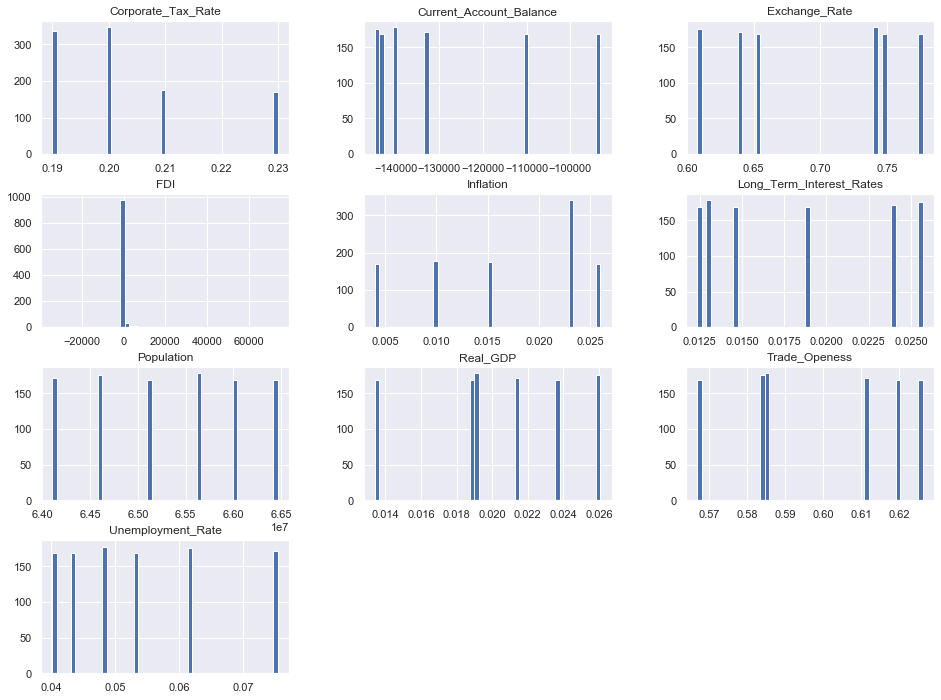

In [29]:
# Creates a histogram for each numerical column
dummy = train_set.hist(bins=50, figsize=(16,12))

In [30]:
# displays descriptive statistics of the numerical variables
train_set.describe()

,FDI,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1.032000e+03,1032.000000,1032.000000
mean,271.119671,0.020452,0.694548,0.018121,-127744.808314,0.053728,0.016773,6.532330e+07,0.203401,0.598678
std,3403.957166,0.003990,0.063440,0.005230,19173.485102,0.011884,0.007870,8.122313e+05,0.013695,0.021424
min,-34071.030000,0.013407,0.607730,0.012358,-144764.900000,0.040167,0.004000,6.410600e+07,0.190000,0.566830
25%,0.000000,0.018921,0.639661,0.013052,-143676.900000,0.043500,0.010000,6.459700e+07,0.190000,0.583980
50%,0.000000,0.020289,0.697590,0.016808,-140349.000000,0.050750,0.015000,6.537900e+07,0.200000,0.584980
75%,0.000000,0.023553,0.749532,0.023898,-110528.400000,0.061417,0.023000,6.604000e+07,0.210000,0.619450
max,74045.730000,0.026075,0.776977,0.025691,-93110.120000,0.075500,0.026000,6.646600e+07,0.230000,0.626190


### Variable Correlations 

In [31]:
corr_matrix = train_set.corr()
corr_matrix['FDI'].sort_values(ascending=False)

FDI                         1.000000
Exchange_Rate               0.036612
Population                  0.032320
Current_Account_Balance     0.026969
Trade_Openess               0.021479
Inflation                   0.014108
Corporate_Tax_Rate         -0.025244
Unemployment_Rate          -0.028569
Real_GDP                   -0.032762
Long_Term_Interest_Rates   -0.035057
Name: FDI, dtype: float64

### Categoric variables 

Not too much to look at in this section 

### Detecting Outliers 

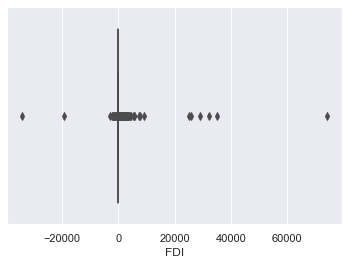

In [32]:
sns.boxplot(x=train_set['FDI'])

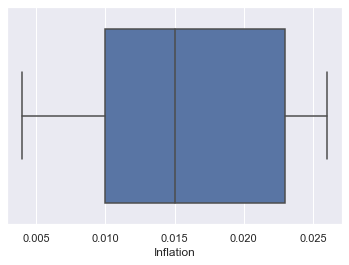

In [33]:
sns.boxplot(x=train_set['Inflation'])

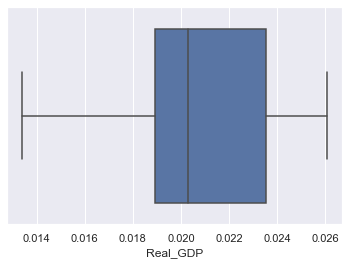

In [34]:
sns.boxplot(x=train_set['Real_GDP'])

# Data Cleaning and Transformation

### Duplicate rows 

In [35]:
# Detects all duplicates from the training set

train_set.duplicated().sum()

0

In [36]:
# Detects all duplicates from the test set

test_set.duplicated().sum()

0

### Missing values 

In [37]:
# Detects the missing values in the training set

train_set.isnull().sum()

Partner_Country             0
Year                        0
FDI                         0
Brexit                      0
Real_GDP                    0
Exchange_Rate               0
Long_Term_Interest_Rates    0
Current_Account_Balance     0
Unemployment_Rate           0
Inflation                   0
Population                  0
Corporate_Tax_Rate          0
Trade_Openess               0
dtype: int64

In [38]:
test_set.isnull().sum()

Partner_Country             0
Year                        0
FDI                         0
Brexit                      0
Real_GDP                    0
Exchange_Rate               0
Long_Term_Interest_Rates    0
Current_Account_Balance     0
Unemployment_Rate           0
Inflation                   0
Population                  0
Corporate_Tax_Rate          0
Trade_Openess               0
dtype: int64

### Dummy Variables 

In [39]:
from sklearn.preprocessing import OneHotEncoder


def get_dummies(train_set, test_set, old_col_name):
    
    one_hot_encoder = OneHotEncoder(categories="auto", sparse=False, drop="first")
    
    # the input to the encoder must be a 2-d numpy array,
    # so we take the column, extract their values and reshape the array to be 2-d
    cat_vals = train_set[old_col_name].values.reshape(-1,1)

    # fit an encoder and transform the **trainset**
    
    # the output is a new numpy array
    transformed = one_hot_encoder.fit_transform(cat_vals)
    
    # in the list of new columns, convert numpy array to a list and
    # drop the first column, because we requested "drop='first'"
    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        train_set[new_col_name] = transformed[:,i]
    
    # transform the **testset** using the fitted encoder
    
    cat_vals = test_set[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # put the transformed data as columns in the trainset dataframe
        test_set[new_col_name] = transformed[:,i]
    
    return train_set, test_set


for col_name in ["Partner_Country","Year","Brexit"]:
    train_set, test_set = get_dummies(train_set, test_set, col_name)

# check if the dummies are produced correctly in the trainset
train_set.head()


,Partner_Country,Year,FDI,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,...,Viet Nam,Yemen,Zambia,Zimbabwe,2014,2015,2016,2017,2018,Yes
333,"Macao, China",2014,0.00,No,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
719,French Southern and Antarctic Territories,2016,0.22,Yes,0.019183,0.740634,0.013052,-140349.00,0.048250,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
937,Georgia,2017,0.00,Yes,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
986,Marshall Islands,2017,0.00,Yes,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1036,Singapore,2017,-1992.08,Yes,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [40]:
# Prints the names of all the columns in the dataframe

print(train_set.columns.values)

['Partner_Country' 'Year' 'FDI' 'Brexit' 'Real_GDP' 'Exchange_Rate'
 'Long_Term_Interest_Rates' 'Current_Account_Balance' 'Unemployment_Rate'
 'Inflation' 'Population' 'Corporate_Tax_Rate' 'Trade_Openess' 'Albania'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia, Plurinational State of' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'Cocos (Keeling) Islands' 'Colombia' 'Congo'
 'Congo, Democratic Republic of the' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 

In [41]:
test_set.head()

,Partner_Country,Year,FDI,Brexit,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,...,Viet Nam,Yemen,Zambia,Zimbabwe,2014,2015,2016,2017,2018,Yes
169,Samoa,2013,-1.59,No,0.021395,0.639661,0.023898,-132605.80,0.075500,0.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
573,Niger,2015,0.00,No,0.023553,0.654545,0.019010,-143676.90,0.053250,0.004,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1007,Northern Mariana Islands,2017,0.00,Yes,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
312,Iraq,2014,0.00,No,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
348,Montenegro,2014,0.00,No,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Prints the names of all the columns in the dataframe

print(test_set.columns.values)

['Partner_Country' 'Year' 'FDI' 'Brexit' 'Real_GDP' 'Exchange_Rate'
 'Long_Term_Interest_Rates' 'Current_Account_Balance' 'Unemployment_Rate'
 'Inflation' 'Population' 'Corporate_Tax_Rate' 'Trade_Openess' 'Albania'
 'Algeria' 'American Samoa' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia, Plurinational State of' 'Bonaire, Sint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China'
 'Cocos (Keeling) Islands' 'Colombia' 'Congo'
 'Congo, Democratic Republic of the' 'Cook Islands' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic'
 'Denmark' 

In [43]:
for col_name in ["Partner_Country","Year","Brexit"]:
    del train_set[col_name]
    del test_set[col_name]

In [44]:
# Let's have another look at the revised train set

train_set.head()

,FDI,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess,...,Viet Nam,Yemen,Zambia,Zimbabwe,2014,2015,2016,2017,2018,Yes
333,0.00,0.026075,0.607730,0.025691,-144764.90,0.061417,0.015,64597000,0.21,0.58398,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
719,0.22,0.019183,0.740634,0.013052,-140349.00,0.048250,0.010,65648000,0.20,0.58498,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
937,0.00,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
986,0.00,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1036,-1992.08,0.018921,0.776977,0.012358,-93110.12,0.043500,0.026,66040000,0.19,0.61945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Feature Scaling 

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Take the target variable out before scaling
trainset_target = train_set["FDI"].values
trainset_predictors = train_set.drop("FDI", axis=1)

# fit_transform returns a NumPy array, so we need to put it back into a Pandas dataframe
scaled_vals = scaler.fit_transform(trainset_predictors)
train_set = pd.DataFrame(scaled_vals, columns=trainset_predictors.columns)

# put the non-scaled target variable back in
train_set["FDI"] = trainset_target

# inspect and look at the newly scaled data
train_set.head()

testset_target = test_set["FDI"].values
testset_predictors = test_set.drop("FDI", axis=1)

scaled_vals = scaler.transform(testset_predictors)
test_set = pd.DataFrame(scaled_vals, columns=testset_predictors.columns)

# Put the non-scaled target variable back in
test_set["FDI"] = testset_target

test_set.head()

,Real_GDP,Exchange_Rate,Long_Term_Interest_Rates,Current_Account_Balance,Unemployment_Rate,Inflation,Population,Corporate_Tax_Rate,Trade_Openess,Albania,...,Yemen,Zambia,Zimbabwe,2014,2015,2016,2017,2018,Yes,FDI
0,0.236607,-0.865595,1.105075,-0.253650,1.832970,0.791546,-1.499438,1.943198,0.613733,-0.076472,...,-0.076472,-0.069775,-0.069775,-0.453440,-0.442525,-0.456542,-0.442525,-0.442525,-1.0,-1.59
1,0.777658,-0.630867,0.170079,-0.831347,-0.040239,-1.623742,-0.262738,-0.248474,-1.487286,-0.076472,...,-0.076472,-0.069775,-0.069775,-0.453440,2.259759,-0.456542,-0.442525,-0.442525,-1.0,0.00
2,-0.383911,1.299948,-1.102520,1.807260,-0.861083,1.172908,0.882811,-0.979032,0.970052,-0.076472,...,-0.076472,-0.069775,-0.069775,-0.453440,-0.442525,-0.456542,2.259759,-0.442525,1.0,0.00
3,1.410092,-1.369163,1.448082,-0.888119,0.647306,-0.225417,-0.894637,0.482083,-0.686386,-0.076472,...,-0.076472,-0.069775,-0.069775,2.205365,-0.442525,-0.456542,-0.442525,-0.442525,-1.0,0.00
4,1.410092,-1.369163,1.448082,-0.888119,0.647306,-0.225417,-0.894637,0.482083,-0.686386,-0.076472,...,-0.076472,-0.069775,-0.069775,2.205365,-0.442525,-0.456542,-0.442525,-0.442525,-1.0,0.00


# Train Models 

In [46]:
# do not print warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
# drop labels for training set, but keep all others
Xtrain = train_set.drop("FDI", axis=1)

ytrain = train_set["FDI"].copy()

### Baseline 

In [48]:
mean_FDI = ytrain.mean()
mean_FDI

271.1196705426357

In [49]:
from sklearn.metrics import mean_squared_error

# yhat will have the same number of rows as ytrain, 
# each cell will be filled with the same value, median_price
yhat = np.full((ytrain.shape[0], 1), mean_FDI)

baseline_mse = mean_squared_error(ytrain, yhat)

# take square root
baseline_rmse = np.sqrt(baseline_mse)

baseline_rmse

3402.307561938902

The baseline is off by $7833 (000) on average 

# Training and evaluating on training data 

## Tuning Hyperparameters 

### Random Forest 

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

forest_reg = RandomForestRegressor(random_state=7)

# specify the hyperparameters and their values
# 6 x 3 x 4 x 4 x 3 = 864 combinations in the grid

param_grid = {
    'n_estimators': [3, 5, 7, 10, 20, 30],
    'max_depth': [1, 2, 3],
    'min_samples_split': [2, 4, 6, 7],
    'max_features': [0.5, 0.6, 0.7, "auto"],
    'min_samples_leaf': [1, 2, 3]
    
    
    
    
    
    
    
    

    
}

# we'll use 10-fold cross-validation
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)

start = time.time()
grid_search.fit(Xtrain, ytrain)
end = time.time() - start
print(f"Took {end} seconds")

Took 414.7169179916382 seconds


In [51]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=None,
                      oob_score=False, random_state=7, verbose=0,
                      warm_start=False)

In [52]:
np.sqrt(-grid_search.best_score_)

2499.536230681087

In [53]:
val_scores = grid_search.cv_results_["mean_test_score"]
train_scores = grid_search.cv_results_["mean_train_score"]
params = [str(x) for x in grid_search.cv_results_["params"]]

for val_score, train_score, param in sorted(zip(val_scores, train_scores, params), reverse=True):
    print(np.sqrt(-val_score), np.sqrt(-train_score), param)

2499.536230681087 2280.133607473239 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 7}
2499.536230681087 2350.319847880968 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 7}
2499.536230681087 2350.319847880968 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 7}
2504.3222735519325 2387.49917234866 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 7}
2504.3222735519325 2387.49917234866 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 7}
2504.3222735519325 2409.6101379439324 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 7}
2504.3222735519325 2409.6101379439324 {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 7}
2533.81589440299

2753.95392618201 2679.1245725559634 {'max_depth': 1, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 7}
2754.5772596382676 2007.5694073166887 {'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 7}
2754.5772596382676 2172.246494908035 {'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 7}
2754.5772596382676 2172.322326288347 {'max_depth': 3, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 7}
2754.808596337352 2122.7331317459984 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 10}
2754.808596337352 2122.7331317459984 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 10}
2755.099856772468 1964.0214920469869 {'max_depth': 3, 'max_features': 0.6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}
2756.21119

3013.3994812333945 2697.8458813497787 {'max_depth': 2, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 30}
3013.3994812333945 2697.84724339018 {'max_depth': 2, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 30}
3013.3994812333945 2697.84724339018 {'max_depth': 2, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 30}
3013.3994812333945 2697.84724339018 {'max_depth': 2, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}
3029.6959029687355 2781.2193936599524 {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 7}
3029.6959029687355 2781.2216197033936 {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 7}
3029.6959029687355 2781.2216197033936 {'max_depth': 3, 'max_features': 0.5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 7}
3029.695

# Feature Importance 

In [54]:
# put them into a separate variable for convenience
feature_importances = grid_search.best_estimator_.feature_importances_

# the order of the features in `feature_importances` is the same as in the Xtrain dataframe,
# so we can "zip" the two and print in the descending order:

for k, v in sorted(zip(feature_importances, Xtrain.columns), reverse=True):
    print(f"{v}: {k}")

United States of America: 0.621214198585871
Japan: 0.23419154511887652
Netherlands: 0.10589679364755082
Luxembourg: 0.03435664251416912
France: 0.004340820133532602
Zimbabwe: 0.0
Zambia: 0.0
Yes: 0.0
Yemen: 0.0
Viet Nam: 0.0
Venezuela, Bolivarian Republic of: 0.0
Vanuatu: 0.0
Uzbekistan: 0.0
Uruguay: 0.0
United States Minor Outlying Islands: 0.0
United Arab Emirates: 0.0
Unemployment_Rate: 0.0
Ukraine: 0.0
Uganda: 0.0
Turks and Caicos Islands: 0.0
Turkmenistan: 0.0
Turkey: 0.0
Tunisia: 0.0
Trinidad and Tobago: 0.0
Trade_Openess: 0.0
Tonga: 0.0
Tokelau: 0.0
Togo: 0.0
Timor-Leste: 0.0
Thailand: 0.0
Tanzania, United Republic of: 0.0
Tajikistan: 0.0
Taipei, Chinese: 0.0
Syrian Arab Republic: 0.0
Switzerland: 0.0
Sweden: 0.0
Suriname: 0.0
Sudan: 0.0
Sri Lanka: 0.0
Spain: 0.0
South Sudan: 0.0
South Africa: 0.0
Solomon Islands: 0.0
Slovenia: 0.0
Slovakia: 0.0
Singapore: 0.0
Sierra Leone: 0.0
Seychelles: 0.0
Serbia: 0.0
Senegal: 0.0
Saudi Arabia: 0.0
Sao Tome and Principe: 0.0
Samoa: 0.0
Saint

In [55]:
import os
from joblib import dump

# create a folder where all trained models will be kept
if not os.path.exists("models"):
    os.makedirs("models")
    
dump(grid_search.best_estimator_, 'models/RF-REG.joblib')

['models/RF-REG.joblib']

# Linear Regression 

In [56]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lin_reg.score(Xtrain, ytrain)

0.6081197931811537

In [58]:
# make predictions
yhat = lin_reg.predict(Xtrain)

lin_mse = mean_squared_error(ytrain, yhat)

# take square root
lin_rmse = np.sqrt(lin_mse)

lin_rmse

2129.8559657650944

In [59]:
importance = lin_reg.coef_

In [60]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -735000706707496.25000
Feature: 1, Score: -18984558466524764.00000
Feature: 2, Score: 4554199375087571.00000
Feature: 3, Score: -11498897074228224.00000
Feature: 4, Score: -22719815191806728.00000
Feature: 5, Score: 6248752058377288.00000
Feature: 6, Score: -7320968212244782.00000
Feature: 7, Score: -3832535347249592.50000
Feature: 8, Score: -3034983040050558.50000
Feature: 9, Score: -17.65625
Feature: 10, Score: -307.00000
Feature: 11, Score: -87.50000
Feature: 12, Score: 4.50000
Feature: 13, Score: 72.37500
Feature: 14, Score: 33.37500
Feature: 15, Score: -52.50000
Feature: 16, Score: -6.75000
Feature: 17, Score: -46.50000
Feature: 18, Score: -18.37500
Feature: 19, Score: 82.75000
Feature: 20, Score: -53.50000
Feature: 21, Score: 61.62500
Feature: 22, Score: 9.62500
Feature: 23, Score: -0.12500
Feature: 24, Score: -18.00000
Feature: 25, Score: 60.40625
Feature: 26, Score: -9.25000
Feature: 27, Score: -18.12500
Feature: 28, Score: -11.09375
Feature: 29, Score: -24.1

In [61]:
print('Intercept: \n', lin_reg.intercept_)
print('Coefficients: \n', lin_reg.coef_)

Intercept: 
 247.29432173925744
Coefficients: 
 [-7.35000707e+14 -1.89845585e+16  4.55419938e+15 -1.14988971e+16
 -2.27198152e+16  6.24875206e+15 -7.32096821e+15 -3.83253535e+15
 -3.03498304e+15 -1.76562500e+01 -3.07000000e+02 -8.75000000e+01
  4.50000000e+00  7.23750000e+01  3.33750000e+01 -5.25000000e+01
 -6.75000000e+00 -4.65000000e+01 -1.83750000e+01  8.27500000e+01
 -5.35000000e+01  6.16250000e+01  9.62500000e+00 -1.25000000e-01
 -1.80000000e+01  6.04062500e+01 -9.25000000e+00 -1.81250000e+01
 -1.10937500e+01 -2.41250000e+01  1.12500000e+01  6.68750000e+00
 -9.03125000e+00 -2.50000000e+00 -2.52500000e+01  3.67500000e+01
 -2.68437500e+01 -6.00000000e+00  4.17500000e+01 -9.25000000e+00
 -4.22500000e+01 -8.70000000e+01 -5.09375000e+00 -2.50000000e+00
  5.00000000e+00 -5.62500000e+00  6.40312500e+01 -8.55000000e+01
 -9.67500000e+01  1.26250000e+01 -2.42500000e+01 -5.00000000e+01
 -2.45000000e+01  1.50000000e+00 -5.25000000e+00 -3.87500000e+00
 -1.21562500e+01  6.12500000e+00 -5.500000

In [62]:
import statsmodels.api as sm

In [63]:
model = sm.OLS(ytrain, Xtrain).fit()

In [64]:
predictions = model.predict(Xtrain)

In [65]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    FDI   R-squared (uncentered):                   0.625
Model:                            OLS   Adj. R-squared (uncentered):              0.524
Method:                 Least Squares   F-statistic:                              6.182
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                    4.37e-82
Time:                        23:23:27   Log-Likelihood:                         -9354.2
No. Observations:                1032   AIC:                                  1.915e+04
Df Residuals:                     813   BIC:                                  2.023e+04
Df Model:                         219                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Real_GDP                                  -3.119e+15   5.66e+15     -0.551      0.582   -1.42e+16    7.98e+15
Exchange_Rate                             -1.669e+16   8.89e+15     -1.878      0.061   -3.41e+16    7.54e+14
Long_Term_Interest_Rates                   4.558e+15    1.3e+16      0.349      0.727    -2.1e+16    3.02e+16
Current_Account_Balance                    1.818e+16   8.52e+15      2.135      0.033    1.47e+15    3.49e+16
Unemployment_Rate                         -3.661e+15   6.68e+15     -0.548      0.584   -1.68e+16    9.44e+15
Inflation                                 -1.618e+16   1.18e+16     -1.376      0.169   -3.93e+16     6.9e+15
Population                                 8.933e+15   8.22e+15      1.087      0.277    -7.2e+15    2.51e+16
Corporate_Tax_Rate                         2.806e+15   3.41e+15      0.822      0.411   -3.89e+15     9.5e+15
Trade_Openess                              8.005e+15   4.53e+15      1.767      0.078   -8.87e+14    1.69e+16
Albania                                      -3.3875    126.890     -0.027      0.979    -252.457     245.682
Algeria                                       1.2377    112.163      0.011      0.991    -218.925     221.400
American Samoa                                8.1601    111.983      0.073      0.942    -211.649     227.969
Andorra                                       0.2045    108.739      0.002      0.999    -213.238     213.647
Angola                                       -1.0788    112.118     -0.010      0.992    -221.154     218.996
Anguilla                                    -16.4425    119.707     -0.137      0.891    -251.414     218.529
Antigua and Barbuda                          -8.2110    119.648     -0.069      0.945    -243.067     226.645
Argentina                                    -3.4495    112.065     -0.031      0.975    -223.420     216.521
Armenia                                      12.9628    119.839      0.108      0.914    -222.267     248.193
Aruba                                       -12.7539    103.712     -0.123      0.902    -216.328     190.820
Australia                                    40.6643    119.748      0.340      0.734    -194.387     275.715
Austria                                      -1.4075    112.553     -0.013      0.990    -222.337     219.522
Azerbaijan                                    6.9505    112.229      0.062      0.951    -213.342     227.243
Bahamas                                       0.2103    119.658      0.002      0.999    -234.666     235.086
Bahrain                                       4.6727    119.605      0.039      0.969    -230.098     239.443
Bangladesh    

In [66]:
# Plotting the residuals via a scatter plot

fig = figure(height=400, width=400)

# the x axis is the fitted values
# the y axis is the standardized residuals
st_resids = model.get_influence().resid_studentized_internal
fig.circle(model.fittedvalues, st_resids)

show(fig)

In [70]:
# create a histogram with 10 bins
hist, edges = np.histogram(st_resids, bins=10)

fig = figure(height=400, width=400)
fig.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")
show(fig)

# Evaluate on the test set

In [67]:
# drop labels for training set, but keep all others
Xtest = test_set.drop("FDI", axis=1)
ytest = test_set["FDI"].copy()

best_model = grid_search.best_estimator_

yhat = best_model.predict(Xtest)

final_mse = mean_squared_error(ytest, yhat)
final_rmse = np.sqrt(final_mse)
final_rmse

1439.9209180113983

### Reduction in RMSE rate 

In [68]:
# Random Forest
100*(baseline_rmse - final_rmse)/baseline_rmse

57.67810840737695

In [69]:
# Linear regression
100*(baseline_rmse - lin_rmse)/baseline_rmse

37.3996639930067